In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('../dataproject2024.xlsx')
data.head()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),Pred_default (y_hat),PD,Group
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0,0,0.024480,1
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1,0,0.331661,0
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0,0,0.187505,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0,0,0.035441,1
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1,0,0.340883,0


In [55]:
data.columns

Index(['ID', 'Job tenure', 'Age', 'Car price', 'Funding amount',
       'Down payment', 'Loan duration', 'Monthly payment', 'Credit event',
       'Married', 'Homeowner', 'Default (y)', 'Pred_default (y_hat)', 'PD',
       'Group'],
      dtype='object')

In [61]:
X = data.drop(columns=['ID','Default (y)', 'Pred_default (y_hat)','PD','Group'])
y = data['PD']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

model = LinearRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)
rmse

np.float64(0.16033557028830137)

In [64]:
features = model.feature_names_in_
features

array(['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment',
       'Loan duration', 'Monthly payment', 'Credit event', 'Married',
       'Homeowner'], dtype=object)

In [65]:
coefficients = model.coef_

<Axes: >

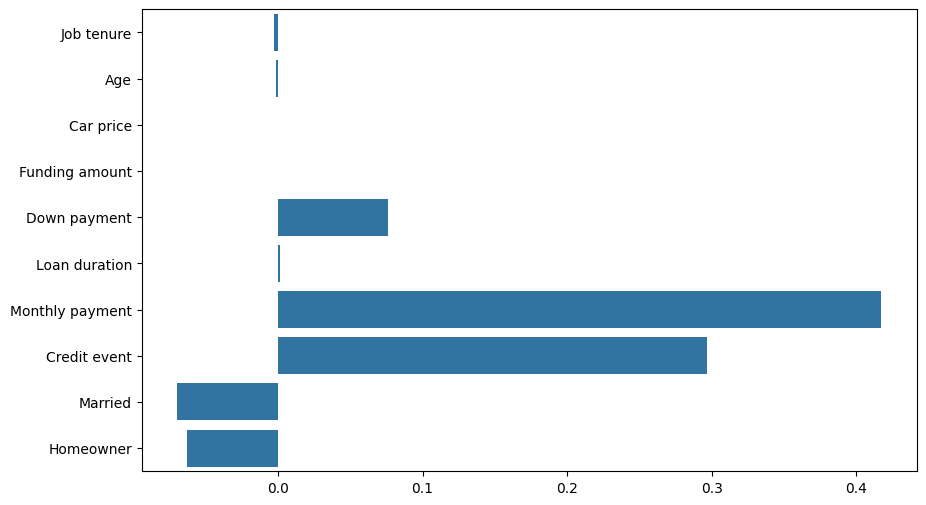

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features)